# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [ ]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xtiemn00.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xtiemn00.wav")


--2023-12-17 01:36:38--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xtiemn00.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xtiemn00.wav.1’

xtiemn00.wav.1      100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 01:36:40 (111 MB/s) - ‘xtiemn00.wav.1’ saved [10044/10044]

--2023-12-17 01:36:40--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav.1’

FIB.wav.1           100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-1

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

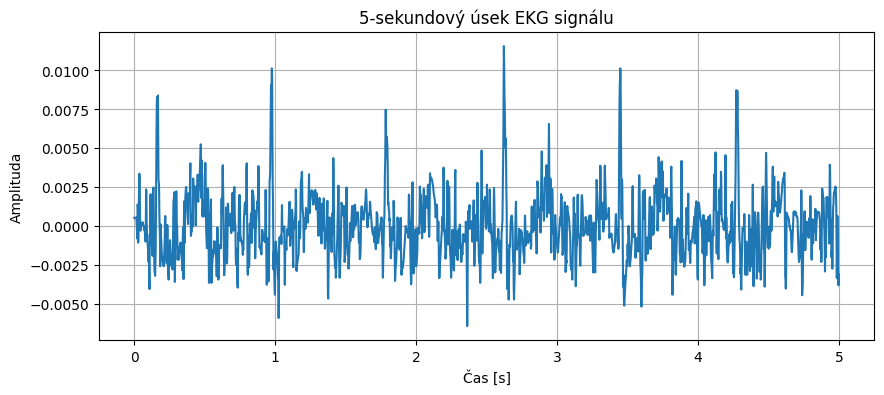

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Výběr 5-sekundového úseku
duration = 5  # délka úseku v sekundách
start = 0  # startovní bod
end = start + duration * fs
segment = x[start:end]

# Zobrazení úseku v časové doméně
time = np.linspace(start, end, len(segment), endpoint=False) / fs
plt.figure(figsize=(10, 4))
plt.plot(time, segment)
plt.title("5-sekundový úsek EKG signálu")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.show()


b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

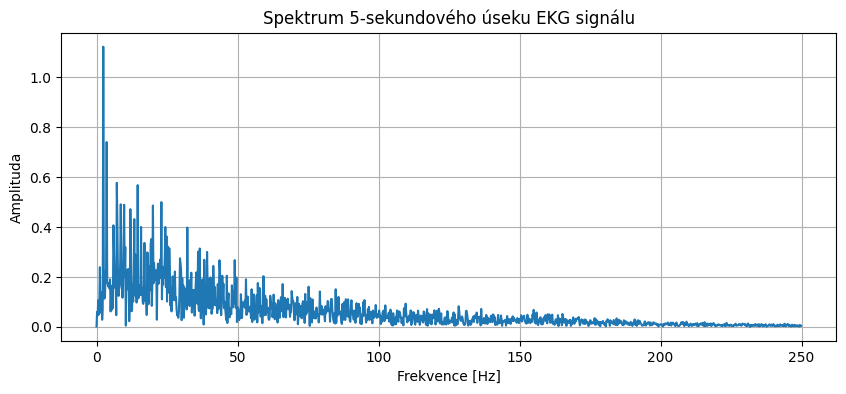

In [ ]:
from scipy.fft import fft

# Výpočet spektra
N = len(segment)
freqs = np.fft.fftfreq(N, 1/fs)
spectrum = fft(segment)

# Zobrazení spektra
plt.figure(figsize=(10, 4))
plt.plot(freqs[:N // 2], np.abs(spectrum)[:N // 2])
plt.title("Spektrum 5-sekundového úseku EKG signálu")
plt.xlabel("Frekvence [Hz]")
plt.ylabel("Amplituda")
plt.grid()
plt.show()

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Rušení z elektrické site se neprojevilo.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [ ]:
from scipy.signal import resample

# Cílová vzorkovací frekvence
new_fs = 100

# Převzorkování signálu
resampled_signal = resample(x, int(len(x) * new_fs / fs))

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

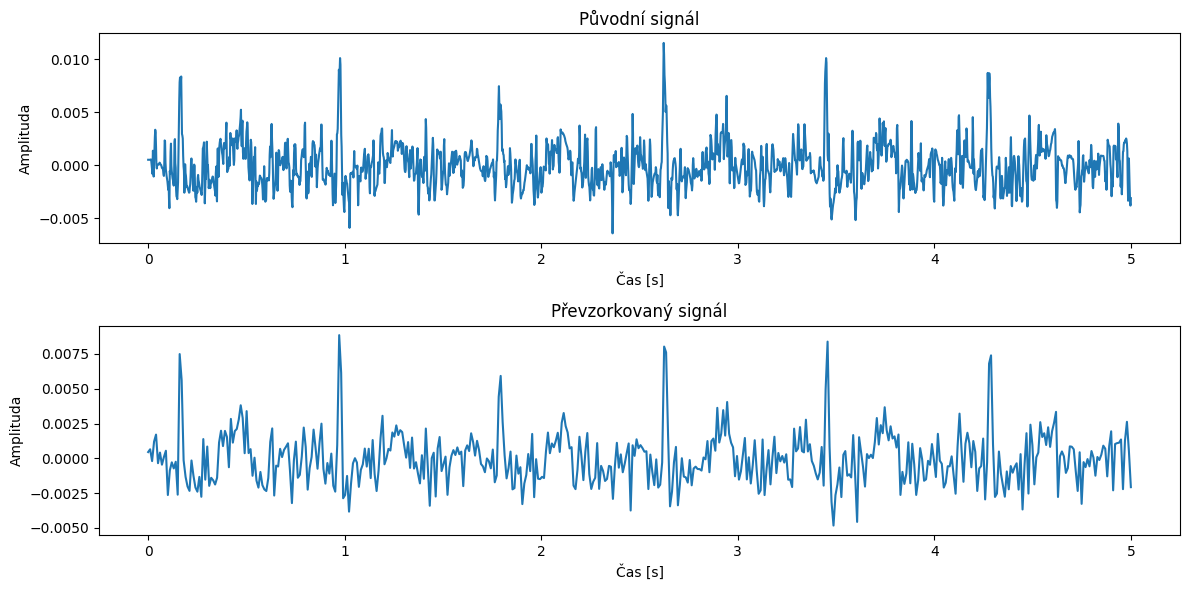

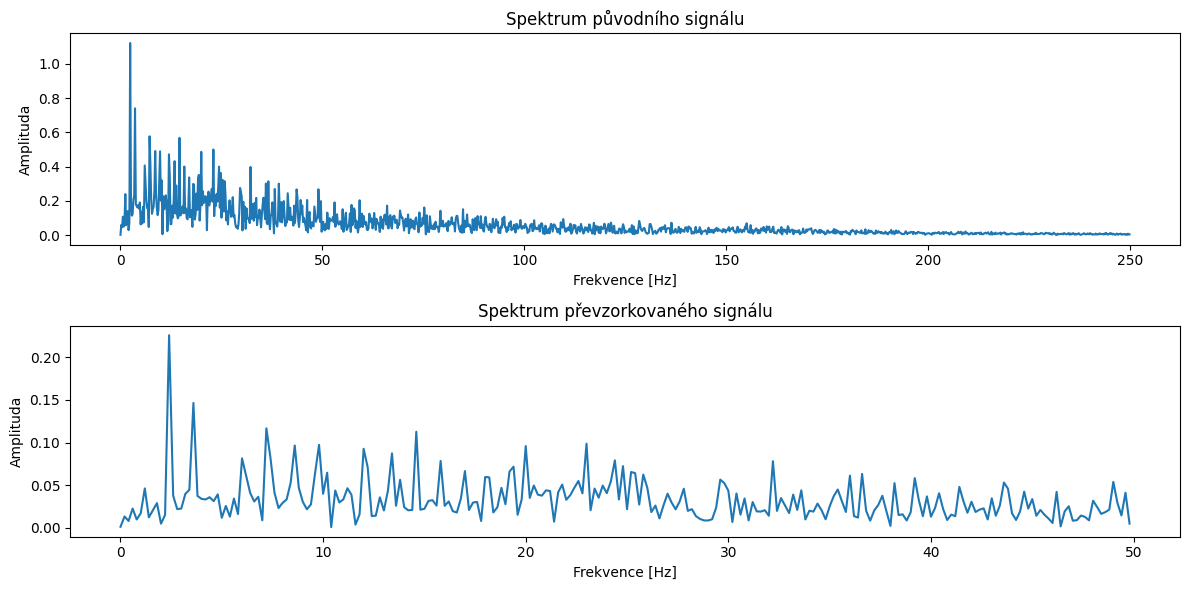

In [ ]:
# Výběr 5-sekundových úseků z obou signálů
original_segment = x[:5*fs]
resampled_segment = resampled_signal[:5*new_fs]

# Zobrazení úseků v časové doméně
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, 5, len(original_segment)), original_segment)
plt.title("Původní signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")

plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, 5, len(resampled_segment)), resampled_segment)
plt.title("Převzorkovaný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.tight_layout()
plt.show()

# Výpočet a zobrazení spektra pro oba signály
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.fft.fftfreq(N, 1/fs)[:N//2], np.abs(fft(original_segment))[:N//2])
plt.title("Spektrum původního signálu")
plt.xlabel("Frekvence [Hz]")
plt.ylabel("Amplituda")

N_resampled = len(resampled_segment)
plt.subplot(2, 1, 2)
plt.plot(np.fft.fftfreq(N_resampled, 1/new_fs)[:N_resampled//2], np.abs(fft(resampled_segment))[:N_resampled//2])
plt.title("Spektrum převzorkovaného signálu")
plt.xlabel("Frekvence [Hz]")
plt.ylabel("Amplituda")
plt.tight_layout()
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

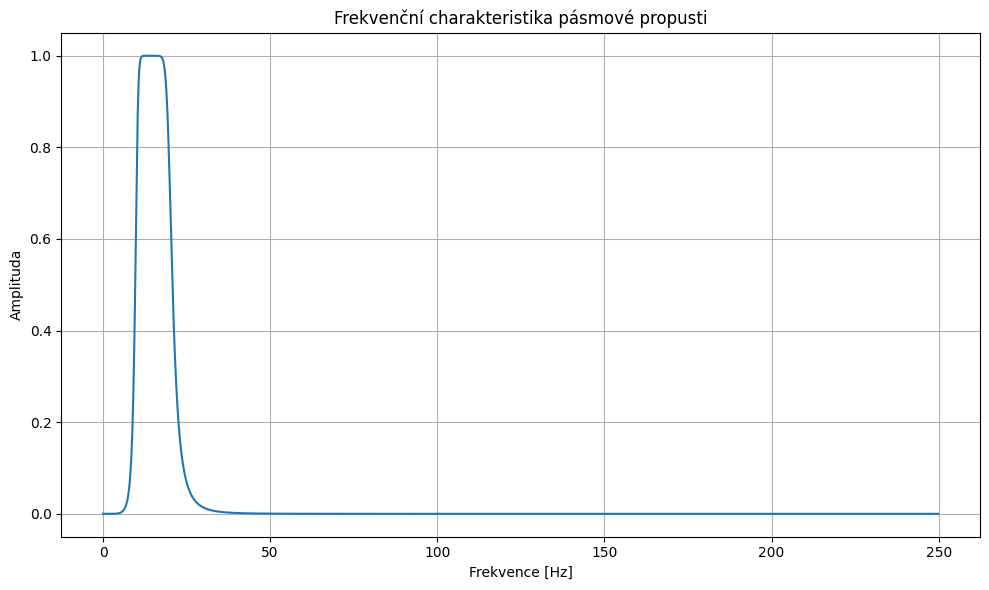

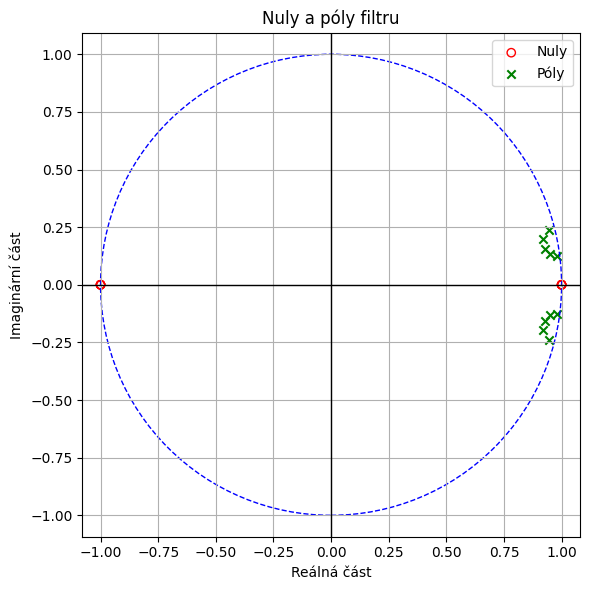

In [ ]:
from scipy.signal import butter, freqz, sos2zpk, sosfreqz

# Parametry filtru
lowcut = 10.0  # Dolní mez pásmové propusti
highcut = 20.0  # Horní mez pásmové propusti
order = 5  # Řád filtru

# Převod koeficientů filtru na second-order sections (SOS) pro lepší stabilitu
sos = butter(order, [lowcut/(0.5*fs), highcut/(0.5*fs)], btype='band', output='sos')

# Získání nul a pólů filtru
z, p, k = sos2zpk(sos)

# Zobrazení frekvenční charakteristiky filtru
w, h = sosfreqz(sos, worN=2000)
plt.figure(figsize=(10, 6))
plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("Frekvenční charakteristika pásmové propusti")
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')
plt.grid()
plt.tight_layout()
plt.show()

# Zobrazení nul a pólů
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='Nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='Póly')

# Vykreslení jednotkového kruhu
unit_circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(unit_circle)

# Vykreslení os X a Y
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

plt.title("Nuly a póly filtru")
plt.xlabel('Reálná část')
plt.ylabel('Imaginární část')
plt.grid()
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


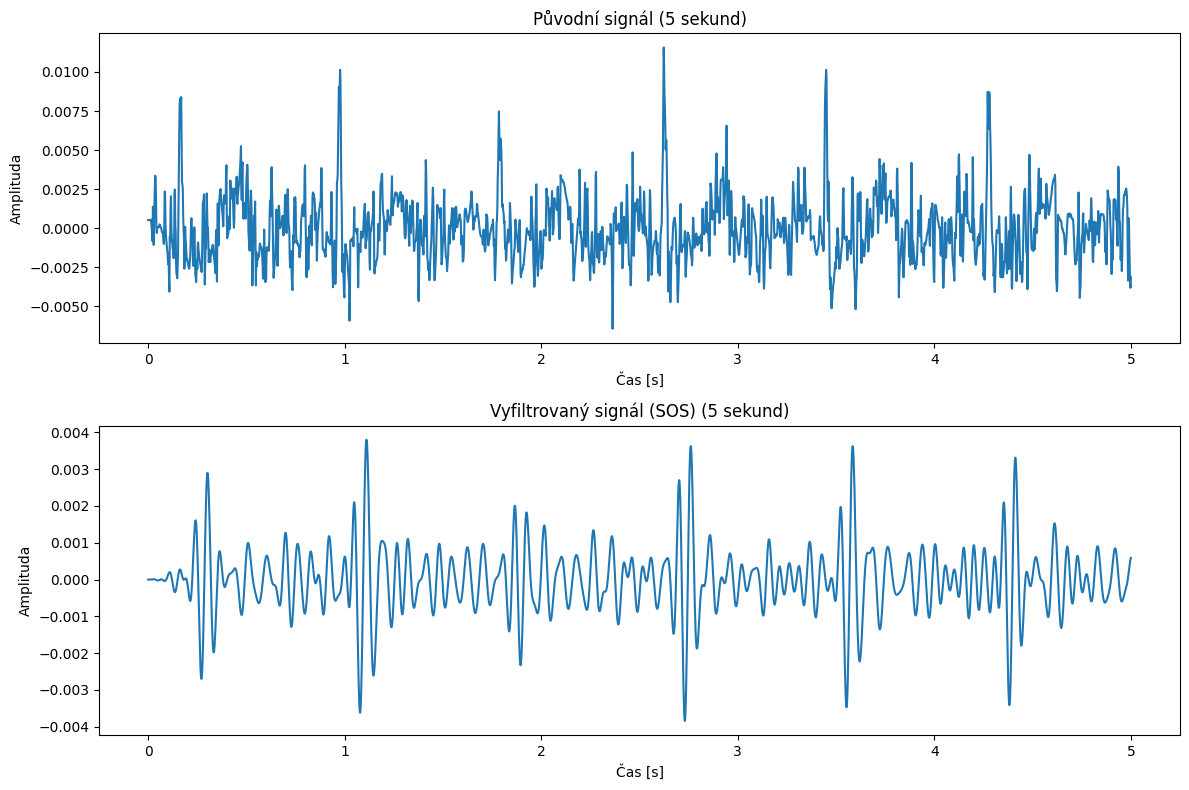

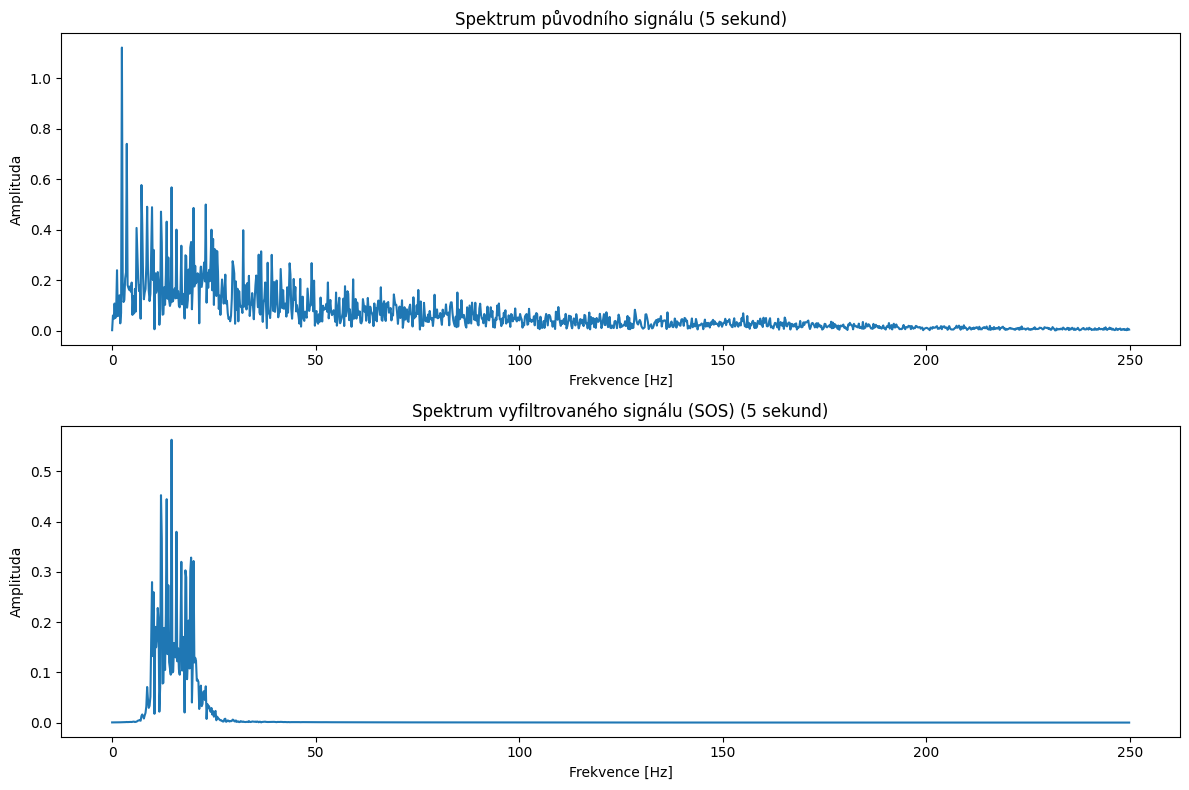

In [ ]:
from scipy.signal import sosfilt

# Použití SOS filtru na signál
filtered_signal_sos = sosfilt(sos, x)

# Výběr 5-sekundových úseků z obou signálů pro zobrazení
filtered_segment_sos = filtered_signal_sos[:5*fs]

# Zobrazení původního a vyfiltrovaného signálu (SOS) v časové doméně
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, 5, len(original_segment)), original_segment)
plt.title("Původní signál (5 sekund)")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")

plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, 5, len(filtered_segment_sos)), filtered_segment_sos)
plt.title("Vyfiltrovaný signál (SOS) (5 sekund)")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.tight_layout()
plt.show()

# Výpočet a zobrazení spektra pro oba signály
N_original = len(original_segment)
N_filtered_sos = len(filtered_segment_sos)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(np.fft.fftfreq(N_original, 1/fs)[:N_original//2], np.abs(fft(original_segment))[:N_original//2])
plt.title("Spektrum původního signálu (5 sekund)")
plt.xlabel("Frekvence [Hz]")
plt.ylabel("Amplituda")

plt.subplot(2, 1, 2)
plt.plot(np.fft.fftfreq(N_filtered_sos, 1/fs)[:N_filtered_sos//2], np.abs(fft(filtered_segment_sos))[:N_filtered_sos//2])
plt.title("Spektrum vyfiltrovaného signálu (SOS) (5 sekund)")
plt.xlabel("Frekvence [Hz]")
plt.ylabel("Amplituda")
plt.tight_layout()
plt.show()

  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



Rozdíl mezi filtrovaným a nefiltrovaným signálem spočívá v tom, že vyfiltrovaný signál bude mít potlačené frekvence mimo pásmo 10Hz-20Hz. To se projeví jak ve změně časového průběhu signálu, tak ve spektru, kde by měly být viditelné pouze frekvence v rozmezí 10Hz-20Hz.
Při použití filtrování jen z jedné strany dojde k fázovému posunu. Teoreticky největší posun ve vzorcích závisí na řádu filtru a konkrétních parametrech (dolní a horní mez frekvence). Čím vyšší je řád filtru, tím větší může být fázový posun.

### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.


   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

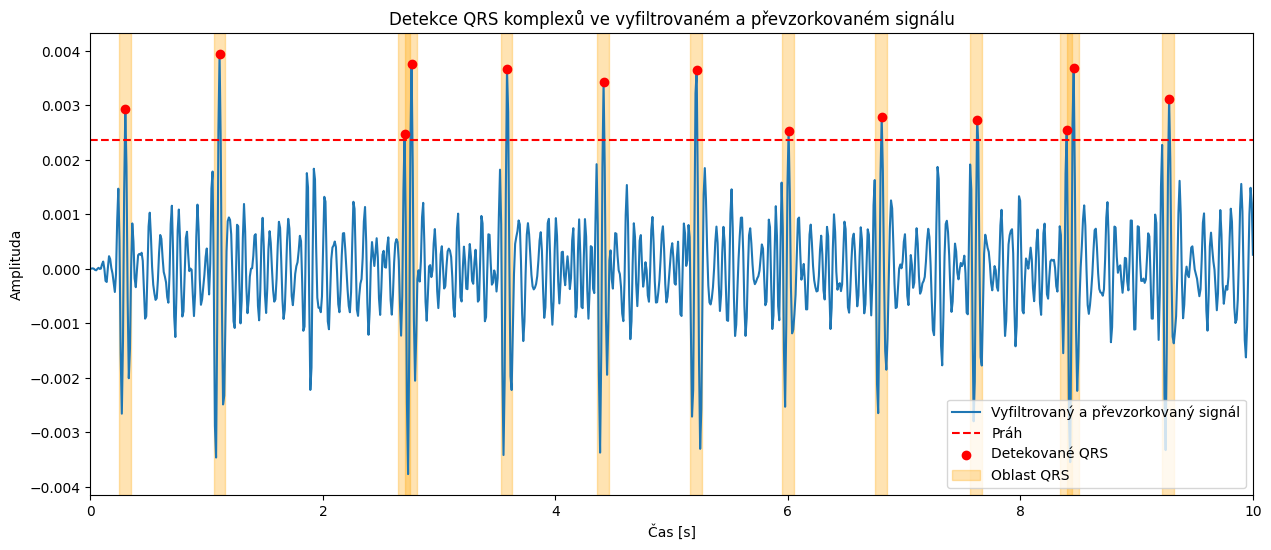

In [ ]:
from scipy.signal import find_peaks

lowcut = 10.0
highcut = 20.0
order = 5
desired_fs = 100

# Definujeme šířku QRS komplexu ve vzorcích
QRS_width_samples = int(0.1 * desired_fs)  # Předpokládám šířku 100 ms

# Znovu načteme signál pro jistotu
signal, original_fs = sf.read("xtiemn00.wav")

# Převzorkování a filtrace signálu
resampled_signal = resample(signal, int(len(signal) * desired_fs / original_fs))

sos = butter(order, [lowcut / (0.5 * desired_fs), highcut / (0.5 * desired_fs)], btype='band', output='sos')

filtered_resampled_signal = sosfilt(sos, resampled_signal)

# Výpočet prahu
threshold = 0.6 * np.max(np.abs(filtered_resampled_signal)) # Nastavení prahu na 60% maximální amplitudy QRS vzorku

# Hledání vrcholů, které překročí nastavený práh
peaks, _ = find_peaks(filtered_resampled_signal, height=threshold)

# Vykreslení grafu se zvýrazněnými QRS detekcemi
plt.figure(figsize=(15, 6))
time_axis = np.linspace(0, len(filtered_resampled_signal) / desired_fs, len(filtered_resampled_signal))
plt.plot(time_axis, filtered_resampled_signal, label='Vyfiltrovaný a převzorkovaný signál')
plt.axhline(threshold, color='red', linestyle='--', label='Práh')
plt.scatter(time_axis[peaks], filtered_resampled_signal[peaks], color='red', zorder=3, label='Detekované QRS')
for peak in peaks:
    plt.axvspan((peak - QRS_width_samples // 2) / desired_fs, (peak + QRS_width_samples // 2) / desired_fs, color='orange', alpha=0.3, label='Oblast QRS' if peak == peaks[0] else "")
plt.xlim(0, 10)  # Omezení grafu na prvních 10 sekund
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.title('Detekce QRS komplexů ve vyfiltrovaném a převzorkovaném signálu')
plt.legend(loc='lower right')
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

In [ ]:
# Zde napište váš kód

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

In [ ]:
# Zde napište váš kód

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

*Zde napište vaše řešení.*

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

In [ ]:
# Zde napište váš kód

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [ ]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód